In [1]:
from quantopian.research import prices, symbols, returns
import random
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.research import prices
from quantopian.pipeline.filters import QTradableStocksUS
import alphalens as al
from pandas.tseries.offsets import BDay
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.factors import BusinessDaysSincePreviousEvent
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.filters import Q500US
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report,precision_score, make_scorer
# import the Pipeline versions
from time import time
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from quantopian.pipeline.data.factset.estimates import PeriodicConsensus
from quantopian.pipeline.domain import US_EQUITIES
import alphalens
import quantopian.pipeline.data.factset.estimates as fe
## This does not seem to be supported on Quantopian
##from sklearn.model_selection import train_test_split
##from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
##from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.linear_model import LogisticRegression
import alphalens
from datetime import timedelta 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.factors import CustomFactor, AverageDollarVolume
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.filters.morningstar import IsPrimaryShare
from datetime import datetime, timedelta, date

from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.factset.estimates import Guidance
from quantopian.pipeline.factors import PercentChange
import seaborn as sns
sns.set(style="white")
import scipy
from sklearn.preprocessing import StandardScaler

# Addl libraries added on 6/11/2020

from quantopian.pipeline import Pipeline, CustomFactor
# from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import SimpleMovingAverage, Returns
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.filters.morningstar import Q500US, Q1500US
from quantopian.pipeline.data import morningstar
import pandas as pd
import math
import numpy as np


class CloseOnN(CustomFactor):  
    # Define inputs
    inputs = [USEquityPricing.close]
    
    # Set window_length to whatever number of days to lookback as a default
    # in the case where no window_length is given when instantiated.
    # This can also be set/over-ridden as shown below:
    # my_close_on_10 = CloseOnN(window_length = 10)
    
    window_length = 2 
    
    def compute(self, today, assets, out, close):  
        out[:] = close[0]




In [2]:
def make_pipeline():

    
    return Pipeline(
        columns={
       'hist_returns' : Returns(window_length=2) ,  # 
       'Close':USEquityPricing.close.latest,
       '10_Day':SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10),
       '50_Day':SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=50),      
#      'Mom': Momentum(),  # Did not Work  with QTradableStocksUS() 
#      'Sector': Sector(),  # Worked  with QTradableStocksUS() 
#       'Vol': Volatility_Daily_Annual(),  # Did not Work  
        'M_Cap': morningstar.valuation.market_cap.latest,   # worked 
        'Div': morningstar.valuation_ratios.dividend_yield.latest, # worked 
        'PE': morningstar.valuation_ratios.pe_ratio.latest,       # worked    
        },
        screen=   QTradableStocksUS()
#         screen = Q1500US()
    )

start_date='2020-05-01'
end_date='2020-05-31'

data = run_pipeline(make_pipeline(), start_date, end_date)
data.head()

10_Day      50_Day   Close  \
2020-05-01 00:00:00+00:00 Equity(2 [HWM])     11.6870   18.082760   13.08   
                          Equity(24 [AAPL])  280.5419  271.035520  293.99   
                          Equity(41 [ARCB])   19.1250   19.448200   20.39   
                          Equity(52 [ABM])    32.4930   29.409872   34.55   
                          Equity(53 [ABMD])  169.0775  154.637460  191.25   

                                                Div         M_Cap         PE  \
2020-05-01 00:00:00+00:00 Equity(2 [HWM])    0.0061  5.697456e+09  12.689320   
                          Equity(24 [AAPL])  0.0105  1.285516e+12  23.133858   
                          Equity(41 [ARCB])  0.0157  5.160881e+08  13.490066   
                          Equity(52 [ABM])   0.0212  2.298097e+09  16.268868   
                          Equity(53 [ABMD])     NaN  8.618235e+09  35.881801   

                                             hist_returns  
2020-05-01 00:00:00+00:00 Equity(2 [HWM])       -0.058315  
                          Equity(24 [AAPL])      0.022823  
                          Equity(41 [ARCB])     -0.059068  
                          Equity(52 [ABM])      -0.038408  
                          Equity(53 [ABMD])      0.131188

In [3]:
asset_list = data.index.get_level_values(1).unique() 

In [4]:
asset_list

array([Equity(2 [HWM]), Equity(24 [AAPL]), Equity(41 [ARCB]), ...,
       Equity(17180 [HLX]), Equity(51051 [KALA]), Equity(53143 [APLT])], dtype=object)

In [5]:
type(asset_list)

<class 'numpy.ndarray'>

In [6]:
prices = get_pricing(asset_list,
                     start_date=start_date,
                     end_date=end_date,# Pricing end date should be later so we can get forward returns
                     fields='close_price')




In [7]:
prices.head()

,Equity(2 [HWM]),Equity(24 [AAPL]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(110 [RAMP]),...,Equity(26578 [GOOG_L]),Equity(31348 [ZYXI]),Equity(52988 [OSW]),Equity(24517 [SPPI]),Equity(34103 [VTA]),Equity(46777 [SPWH]),Equity(53275 [PSNL]),Equity(17180 [HLX]),Equity(51051 [KALA]),Equity(53143 [APLT])
2020-05-01 00:00:00+00:00,12.54,287.990,20.583,33.14,183.30,89.59,26.891,174.77,38.88,36.65,...,1316.24,16.34,5.955,2.675,8.095,7.250,9.910,2.175,9.61,36.59
2020-05-04 00:00:00+00:00,11.96,292.378,19.179,32.33,181.01,89.85,27.290,177.76,38.22,36.23,...,1322.51,18.34,6.120,2.800,8.076,7.420,10.135,2.290,10.63,37.43
2020-05-05 00:00:00+00:00,12.19,296.976,21.858,32.21,186.22,92.99,28.117,180.49,37.44,36.82,...,1349.65,18.52,5.800,2.860,8.145,7.370,10.380,2.245,10.55,41.99
2020-05-06 00:00:00+00:00,11.49,299.688,20.504,31.06,186.91,91.08,26.472,181.16,37.68,37.09,...,1345.17,17.86,5.450,2.880,8.224,7.400,10.500,2.160,11.64,45.06
2020-05-07 00:00:00+00:00,11.89,302.770,20.713,31.53,188.59,93.88,27.150,184.33,37.58,38.20,...,1368.19,18.99,5.790,2.860,8.224,7.295,10.280,2.190,11.85,44.75


Notes:
DF: data       contains list of assets and returns
DF: asset_list contains list of assets out of DF: data
DF: prices     contains list of assets and closing price

In [8]:
df_i_1 = al.utils.get_clean_factor_and_forward_returns(
    data['hist_returns'],   # Change the factor to test
    prices=prices,
    quantiles=5,
    periods =(1,),
    max_loss=100,
)


Dropped 9.6% entries from factor data: 9.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 10000.0%, not exceeded: OK!


In [9]:
df_i_1 
# Merged DF: from data and prices

1D    factor  \
date                      asset                                      
2020-05-01 00:00:00+00:00 Equity(2 [HWM])      -0.046252 -0.058315   
                          Equity(24 [AAPL])     0.015237  0.022823   
                          Equity(41 [ARCB])    -0.068212 -0.059068   
                          Equity(52 [ABM])     -0.024442 -0.038408   
                          Equity(53 [ABMD])    -0.012493  0.131188   
                          Equity(62 [ABT])      0.002902 -0.001920   
                          Equity(64 [GOLD])     0.014838 -0.029068   
                          Equity(67 [ADSK])     0.017108 -0.005158   
                          Equity(76 [TAP])     -0.016975 -0.110629   
                          Equity(110 [RAMP])   -0.011460 -0.006293   
                          Equity(114 [ADBE])    0.014882  0.011740   
                          Equity(122 [ADI])    -0.000049 -0.032261   
                          Equity(128 [ADM])    -0.007154 -0.032561   
                          Equity(154 [AEM])     0.034082 -0.031338   
                          Equity(161 [AEP])     0.020281  0.000120   
                          Equity(166 [AES])    -0.010039 -0.067389   
                          Equity(185 [AFL])    -0.022682 -0.050752   
                          Equity(197 [AGCO])   -0.009785 -0.019848   
                          Equity(216 [HES])     0.045485 -0.009478   
                          Equity(239 [AIG])     0.005446 -0.067327   
                          Equity(247 [AIN])     0.014205 -0.082197   
                          Equity(253 [AIR])    -0.016958 -0.036909   
                          Equity(266 [AJG])     0.034723 -0.011051   
                          Equity(289 [MATX])   -0.009886 -0.059172   
                          Equity(300 [ALK])    -0.044910 -0.045775   
                          Equity(301 [ALKS])    0.031532 -0.051378   
                          Equity(337 [AMAT])    0.018172 -0.086981   
                          Equity(351 [AMD])     0.054898 -0.021634   
                          Equity(353 [AME])    -0.009449 -0.006102   
                          Equity(368 [AMGN])   -0.000109  0.012075   
...                                                  ...       ...   
2020-05-28 00:00:00+00:00 Equity(53179 [FSLY])  0.058838  0.002798   
                          Equity(53181 [AVTR])  0.037684  0.047726   
                          Equity(53196 [CTVA])  0.011856  0.005848   
                          Equity(53238 [RVLV])  0.013788  0.031528   
                          Equity(53244 [AMCR])  0.018018 -0.002023   
                          Equity(53248 [CRWD])  0.105031 -0.016509   
                          Equity(53251 [FVRR])  0.080618 -0.062349   
                          Equity(53256 [CHWY])  0.063443 -0.038129   
                          Equity(53260 [IAA])   0.010856  0.041773   
                          Equity(53267 [STOK])  0.024944  0.045052   
                          Equity(53271 [WORK])  0.078058 -0.008184   
                          Equity(53273 [GO])    0.017418  0.007561   
                          Equity(53275 [PSNL])  0.000000 -0.040898   
                          Equity(53293 [BSTZ])  0.000946 -0.003349   
                          Equity(53303 [BBIO]) -0.163201  0.011908   
                          Equity(53304 [ADPT]) -0.005651 -0.006104   
                          Equity(53306 [CHNG])  0.009701  0.016619   
                          Equity(53313 [REAL]) -0.009623  0.074159   
                          Equity(53314 [KRTX])  0.042421  0.033884   
                          Equity(53352 [ORCC]) -0.019078  0.005534   
                          Equity(53353 [PHR])  -0.003061 -0.022981   
                          Equity(53360 [IHRT])  0.070111  0.085030   
                          Equity(53362 [MDLA])  0.034760  0.002868   
                          Equity(53365 [AFYA])  0.047215  0.046377   
                          Equity(53370 [HCAT])  0.000369 -0.0003

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.791519,0.021984,-0.040021,0.033822,8047,20.015421
2,-0.061903,0.048847,-0.011909,0.024617,8037,19.990548
3,-0.044317,0.072380,0.002279,0.025715,8039,19.995523
4,-0.031718,0.099371,0.016889,0.028082,8037,19.990548
5,-0.016191,2.297120,0.052379,0.059542,8044,20.007959


Returns Analysis


,1D
Ann. alpha,-0.215
beta,0.056
Mean Period Wise Return Top Quantile (bps),6.305
Mean Period Wise Return Bottom Quantile (bps),10.986
Mean Period Wise Spread (bps),-4.681


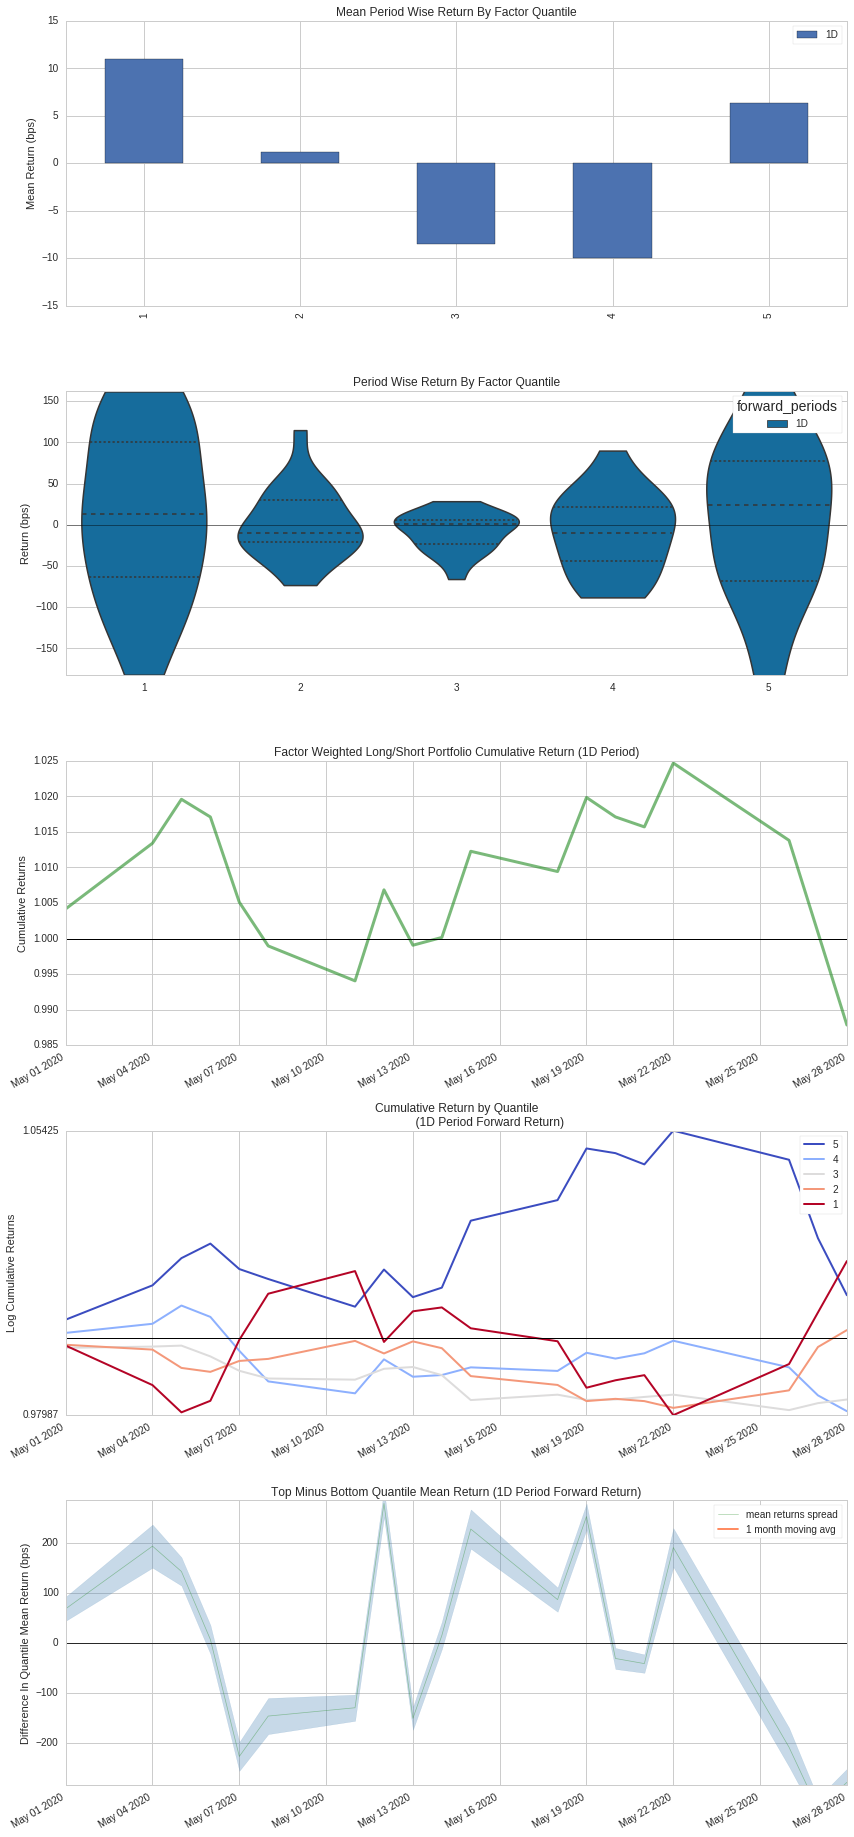

Information Analysis


,1D
IC Mean,-0.015
IC Std.,0.213
Risk-Adjusted IC,-0.070
t-stat(IC),-0.304
p-value(IC),0.764
IC Skew,-0.216
IC Kurtosis,-0.801


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


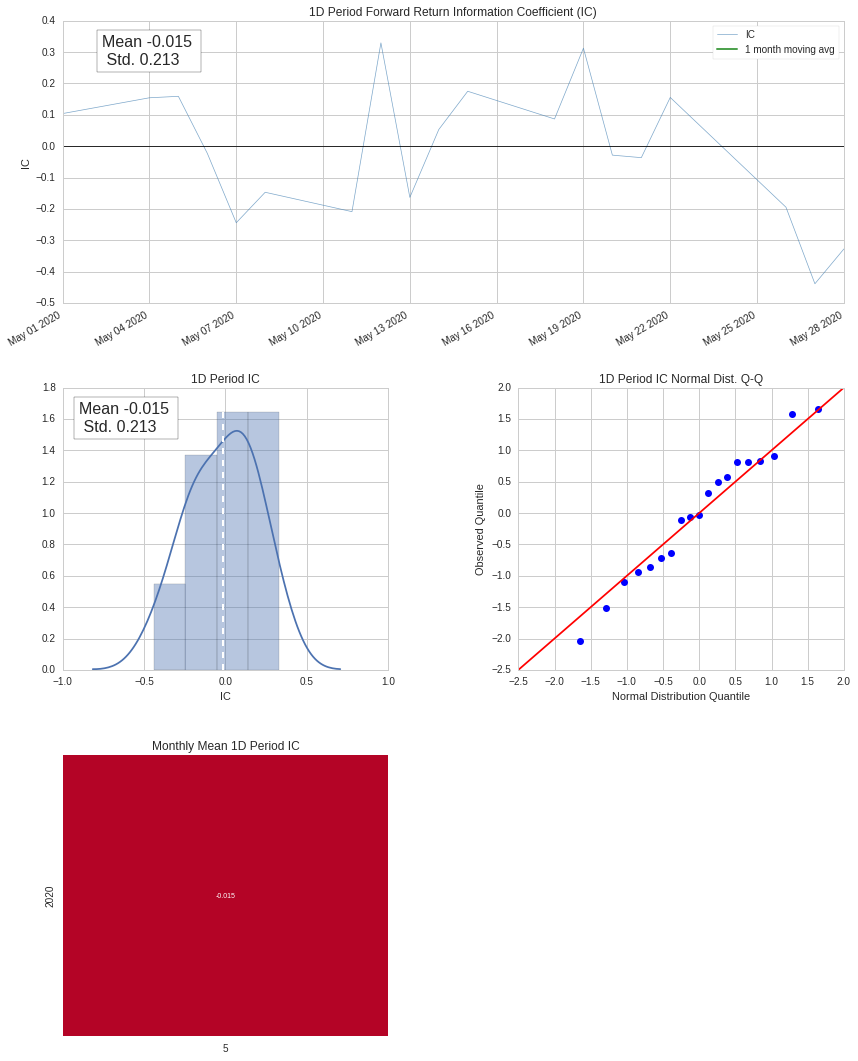

Turnover Analysis


/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


,1D
Quantile 1 Mean Turnover,0.798
Quantile 2 Mean Turnover,0.782
Quantile 3 Mean Turnover,0.767
Quantile 4 Mean Turnover,0.787
Quantile 5 Mean Turnover,0.776


,1D
Mean Factor Rank Autocorrelation,-0.043


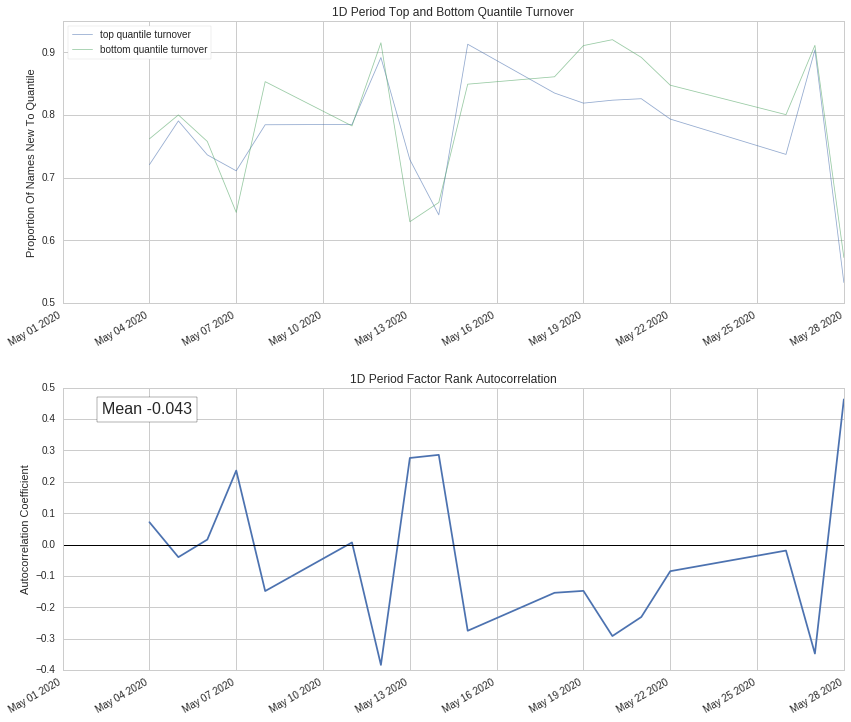

In [10]:
 alphalens.tears.create_full_tear_sheet(df_i_1, by_group=False);

In [11]:
#from quantopian.research import prices, symbols, returns
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
#from quantopian.research import prices
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.factors import Returns
import numpy as np
import alphalens as al
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import USEquityPricing
from quantopian.research import volumes, symbols, prices

class CloseOnN(CustomFactor):  
    
    # Define inputs
    inputs = [USEquityPricing.close]
    
    # Set window_length to whatever number of days to lookback as a default
    # in the case where no window_length is given when instantiated.
    # This can also be set/over-ridden as shown below:
    # my_close_on_10 = CloseOnN(window_length = 10)
    
    window_length = 2 
    
    def compute(self, today, assets, out, close):  
        out[:] = close[0]

def make_pipeline():
   
    #longs  = Returns(window_length=2).percentile_between(0,20,mask=QTradableStocksUS())
    #shorts = Returns(window_length=2).percentile_between(80,100,mask=QTradableStocksUS())   
    longs = Returns(window_length=2).bottom(1,mask=QTradableStocksUS())
    shorts = Returns(window_length=2).top(1,mask=QTradableStocksUS())    

    return Pipeline(
        columns={
            'longs':  longs,
            'shorts': shorts,
            'Returns':Returns(window_length=2)
            #'close_1': CloseOnN(window_length = 1),
            #'close_2': CloseOnN(window_length = 2),
            #'close_3': CloseOnN(window_length = 3),
        },
        screen=QTradableStocksUS()& (shorts | longs)
    )
# start_date='2002-11-01'
start_date='2020-06-01'
end_date='2020-06-05'
data = run_pipeline(make_pipeline(), start_date, end_date)

In [12]:
data[data['longs']==True]

,,Returns,longs,shorts
2020-06-01 00:00:00+00:00,Equity(52454 [ARVN]),-0.256594,True,False
2020-06-02 00:00:00+00:00,Equity(49100 [EVH]),-0.229842,True,False
2020-06-03 00:00:00+00:00,Equity(22151 [OSUR]),-0.142958,True,False
2020-06-04 00:00:00+00:00,Equity(45239 [PGEN]),-0.169444,True,False
2020-06-05 00:00:00+00:00,Equity(51961 [SMAR]),-0.229812,True,False


In [13]:
data[data['shorts']==True]

,,Returns,longs,shorts
2020-06-01 00:00:00+00:00,Equity(21104 [AGEN]),0.297909,False,True
2020-06-02 00:00:00+00:00,Equity(40165 [AMRS]),0.440860,False,True
2020-06-03 00:00:00+00:00,Equity(45239 [PGEN]),0.824885,False,True
2020-06-04 00:00:00+00:00,Equity(20799 [DHC]),0.364221,False,True
2020-06-05 00:00:00+00:00,Equity(45971 [AAL]),0.412221,False,True


In [14]:
data

Returns  longs shorts
2020-06-01 00:00:00+00:00 Equity(21104 [AGEN])  0.297909  False   True
                          Equity(52454 [ARVN]) -0.256594   True  False
2020-06-02 00:00:00+00:00 Equity(40165 [AMRS])  0.440860  False   True
                          Equity(49100 [EVH])  -0.229842   True  False
2020-06-03 00:00:00+00:00 Equity(22151 [OSUR]) -0.142958   True  False
                          Equity(45239 [PGEN])  0.824885  False   True
2020-06-04 00:00:00+00:00 Equity(20799 [DHC])   0.364221  False   True
                          Equity(45239 [PGEN]) -0.169444   True  False
2020-06-05 00:00:00+00:00 Equity(45971 [AAL])   0.412221  False   True
                          Equity(51961 [SMAR]) -0.229812   True  False

In [15]:
close = prices(
    assets=symbols(['INO','NVAX','SMAR','CMTL']),
    start='2020-06-02',
    end='2020-06-08',
    frequency='daily'
)
close.head(20)

,Equity(3150 [INO]),Equity(14112 [NVAX]),Equity(51961 [SMAR]),Equity(1675 [CMTL])
2020-06-02 00:00:00+00:00,14.370,49.61,58.330,18.510
2020-06-03 00:00:00+00:00,12.470,44.25,59.070,21.010
2020-06-04 00:00:00+00:00,11.878,44.66,45.495,17.190
2020-06-05 00:00:00+00:00,11.951,46.28,44.540,17.643
2020-06-08 00:00:00+00:00,12.053,44.77,45.550,19.730


In [16]:
data["factor"] = np.where(data["longs"]==True, 1, 0)
data.head()

Returns  longs shorts  factor
2020-06-01 00:00:00+00:00 Equity(21104 [AGEN])  0.297909  False   True       0
                          Equity(52454 [ARVN]) -0.256594   True  False       1
2020-06-02 00:00:00+00:00 Equity(40165 [AMRS])  0.440860  False   True       0
                          Equity(49100 [EVH])  -0.229842   True  False       1
2020-06-03 00:00:00+00:00 Equity(22151 [OSUR]) -0.142958   True  False       1

In [17]:
asset_list = data.index.get_level_values(1).unique() 
type(asset_list)

<class 'numpy.ndarray'>

In [18]:
prices = get_pricing(asset_list,
                     start_date=start_date,
                     end_date=end_date,
                     fields='close_price')
prices.head()

,Equity(21104 [AGEN]),Equity(52454 [ARVN]),Equity(40165 [AMRS]),Equity(49100 [EVH]),Equity(22151 [OSUR]),Equity(45239 [PGEN]),Equity(20799 [DHC]),Equity(45971 [AAL]),Equity(51961 [SMAR])
2020-06-01 00:00:00+00:00,4.27,33.21,5.36,6.839,14.130,2.170,3.560,11.109,59.340
2020-06-02 00:00:00+00:00,4.09,32.76,4.85,6.370,12.110,3.960,3.885,11.200,58.330
2020-06-03 00:00:00+00:00,3.76,33.59,5.01,6.190,11.310,3.289,5.300,11.848,59.070
2020-06-04 00:00:00+00:00,3.73,32.94,4.86,6.300,10.789,3.220,5.340,16.732,45.495
2020-06-05 00:00:00+00:00,3.84,35.58,4.67,6.180,10.340,3.210,6.100,18.590,44.540


In [19]:
df_i_1 = al.utils.get_clean_factor_and_forward_returns(
    data['longs'],
    prices=prices,
    quantiles=5,
    periods =(1,),
#    max_loss=100,
     max_loss=1,
)

Dropped 20.0% entries from factor data: 20.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


In [20]:
df_i_1.sort_values('factor_quantile')
df_i_1.head(100)

1D factor  \
date                      asset                                   
2020-06-01 00:00:00+00:00 Equity(21104 [AGEN]) -0.042155  False   
                          Equity(52454 [ARVN]) -0.013550   True   
2020-06-02 00:00:00+00:00 Equity(40165 [AMRS])  0.032990  False   
                          Equity(49100 [EVH])  -0.028257   True   
2020-06-03 00:00:00+00:00 Equity(22151 [OSUR]) -0.046065   True   
                          Equity(45239 [PGEN]) -0.020979  False   
2020-06-04 00:00:00+00:00 Equity(20799 [DHC])   0.142322  False   
                          Equity(45239 [PGEN]) -0.003106   True   

                                                factor_quantile  
date                      asset                                  
2020-06-01 00:00:00+00:00 Equity(21104 [AGEN])                1  
                          Equity(52454 [ARVN])                5  
2020-06-02 00:00:00+00:00 Equity(40165 [AMRS])                1  
                          Equity(49100 [EVH])                 5  
2020-06-03 00:00:00+00:00 Equity(22151 [OSUR])                5  
                          Equity(45239 [PGEN])                1  
2020-06-04 00:00:00+00:00 Equity(20799 [DHC])                 1  
                          Equity(45239 [PGEN])                5

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,False,False,False,0.0,4,50.0
5,True,True,True,0.0,4,50.0


Returns Analysis


,1D
Ann. alpha,-0.997
beta,-0.720
Mean Period Wise Return Top Quantile (bps),-253.946
Mean Period Wise Return Bottom Quantile (bps),253.946
Mean Period Wise Spread (bps),-507.892


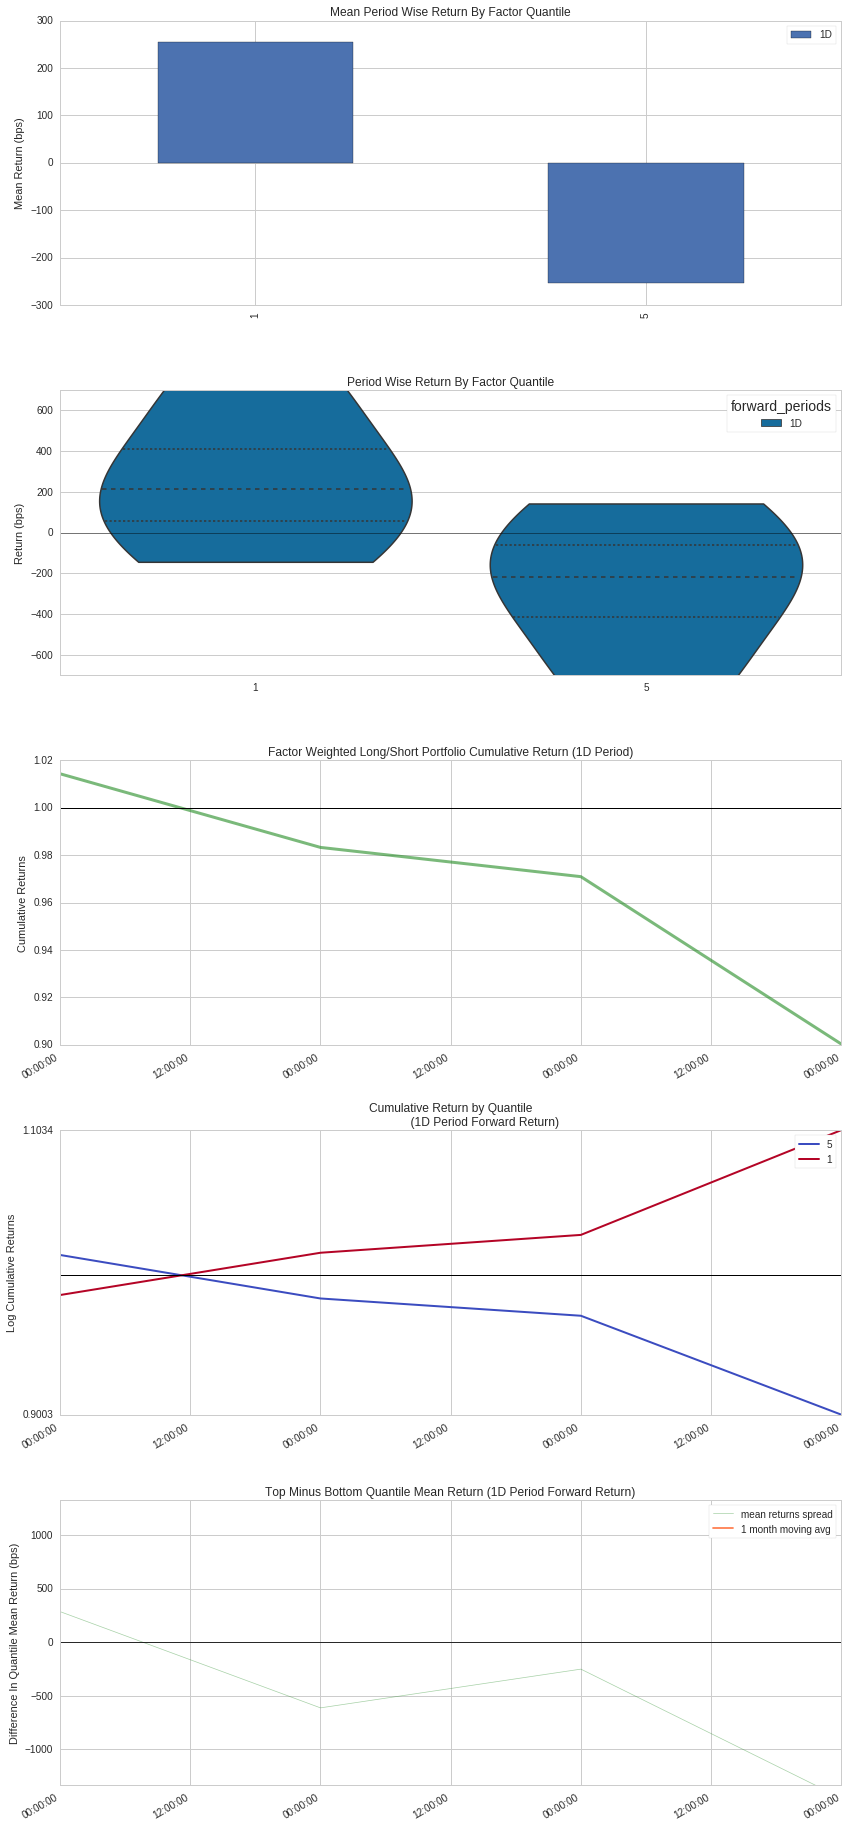

Information Analysis


,1D
IC Mean,-0.500
IC Std.,1.000
Risk-Adjusted IC,-0.500
t-stat(IC),-1.000
p-value(IC),0.391
IC Skew,1.155
IC Kurtosis,-0.667


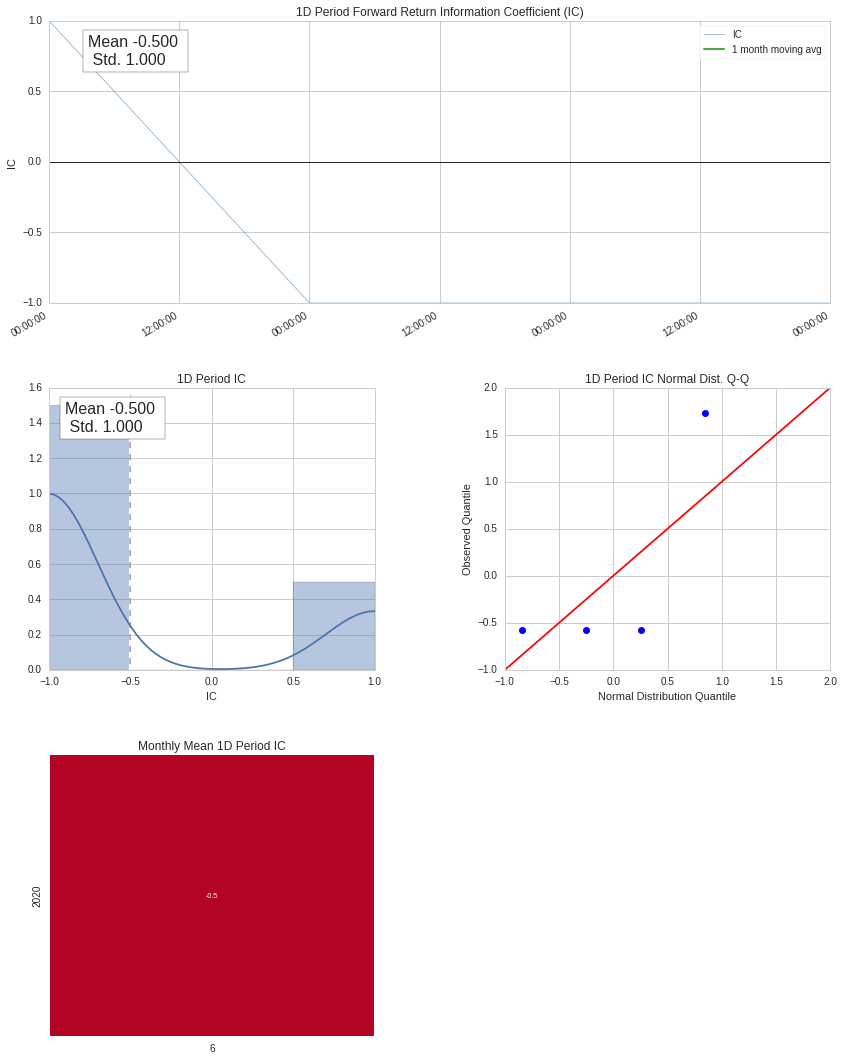

Turnover Analysis


,1D
Quantile 1 Mean Turnover,1.0
Quantile 5 Mean Turnover,1.0


,1D
Mean Factor Rank Autocorrelation,NaN


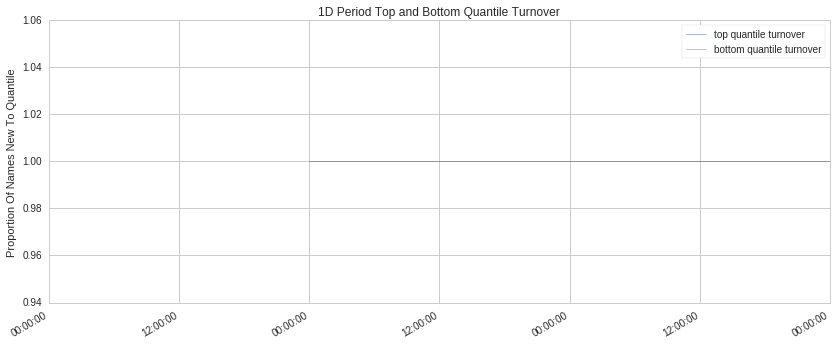

In [21]:
al.tears.create_full_tear_sheet(df_i_1, by_group=False);